<a href="https://colab.research.google.com/github/arezoog/AISCWorkshop2024-template/blob/main/AISC_Weekend_Workshop_3_Winter_Quarter_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Introduction to PyTorch: Fashion Item Classification

# ## Overview
# In this tutorial, we'll learn the basics of PyTorch by building a simple fashion item classification model.
# We'll use the Fashion-MNIST dataset, which consists of 70,000 28x28 grayscale images in 10 classes.

# ## Setup
# First, let's import the necessary libraries and set up our environment.

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [1]:
# ## Dataset
# We'll use the built-in Fashion-MNIST dataset from torchvision, which automatically downloads the data if it's not present.
# The dataset consists of 70,000 grayscale images, each with a size of 28x28 pixels
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True) #Shuffling the training data to prevents it from learning patterns based on the order of the samples
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



NameError: name 'datasets' is not defined

In [ ]:
# ## Model
# We'll define a simple convolutional neural network for image classification.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)#Used to extract features
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128) #Used to flatten outputs from the conv layers
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net().to(device)



In [ ]:
# ## Training
# We'll train our model using the cross-entropy loss and the Adam optimizer.
criterion = nn.CrossEntropyLoss() #multi-class classification task
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 3
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0


    #We iterate over the batches of images and labels from train_dataloader using tqdm (Used to show progress of training)
    pbar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad() #Zero gradients to prevent accumalation from previous iterations
        outputs = model(images)  #Getting predicted outputs from out model
        loss = criterion(outputs, labels) #Using cross entropy loss to calculate the loss of our model
        loss.backward() #Preforming backpropagation
        optimizer.step() #updating model parameters based off backpropagation


        #Monitoring the training progress
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        pbar.set_postfix(loss=running_loss / total, acc=100.0 * correct / total)


Epoch 3/3: 100%|██████████| 938/938 [00:13<00:00, 71.55batch/s, acc=93, loss=0.00296]


In [ ]:
# ## Testing
# Let's evaluate our model on the test set and visualize some predictions.


model.eval()
correct = 0
total = 0

#Dissabling gradient computation since we are not training the model
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images) #Passes batches of images through out model

        #Calculating the accuracy of our model
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_acc = 100.0 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")


Test Accuracy: 89.00%


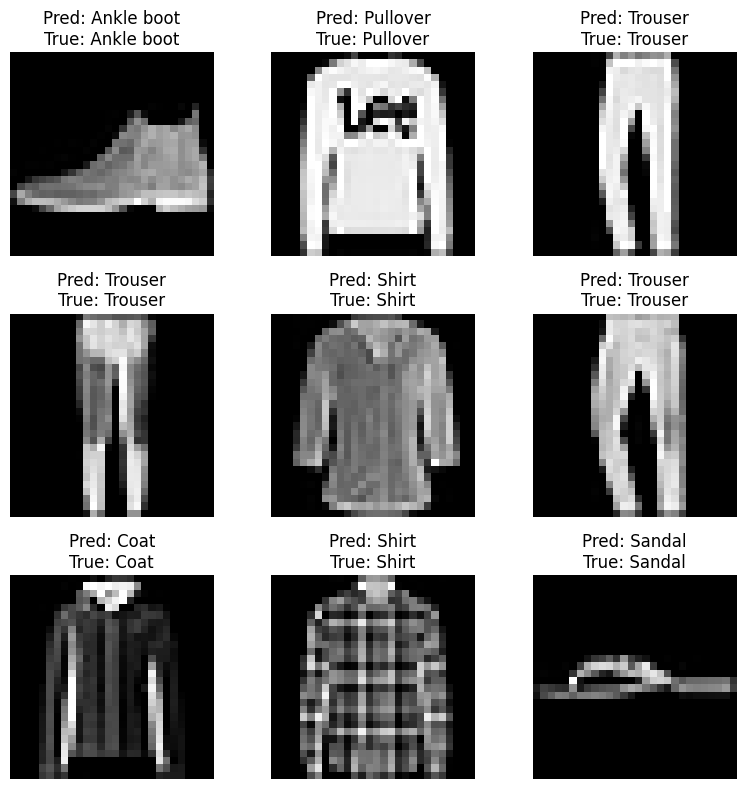

In [ ]:
# Visualize some predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
with torch.no_grad():
    for i, (image, label) in enumerate(test_dataset):
        if i == 9:
            break
        image = image.unsqueeze(0).to(device)
        output = model(image)
        _, predicted = output.max(1)

        ax = axes[i // 3, i % 3]
        ax.imshow(image.squeeze().cpu(), cmap='gray')
        ax.set_title(f"Pred: {class_labels[predicted]}\nTrue: {class_labels[label]}")
        ax.axis("off")

plt.tight_layout()
plt.show()

# ## Conclusion
# In this tutorial, we learned how to:
# - Use the built-in Fashion-MNIST dataset from torchvision
# - Define a simple convolutional neural network for image classification
# - Train the model using the cross-entropy loss and Adam optimizer
# - Evaluate the model on the test set and visualize predictions
# - Use tqdm to display progress bars during training
#
# This is just a starting point, and there are many ways to improve the model, such as using more advanced architectures, data augmentation techniques, and hyperparameter tuning.